Dataset : https://www.kaggle.com/mohansacharya/graduate-admissions

申請學校的資料分析
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

In [6]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

In [21]:
data_path = "./Admission_Predict.csv"
pd_data = pd.read_csv(data_path)
pd_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [55]:
pd_data.sort_values(by = 'Chance of Admit ', ascending=False)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
143,144,340,120,4,4.5,4.0,9.92,1,0.97
24,25,336,119,5,4.0,3.5,9.80,1,0.97
202,203,340,120,5,4.5,4.5,9.91,1,0.97
203,204,334,120,5,4.0,5.0,9.87,1,0.97
71,72,336,112,5,5.0,5.0,9.76,1,0.96
213,214,333,119,5,5.0,4.5,9.78,1,0.96
385,386,335,117,5,5.0,5.0,9.82,1,0.96
384,385,340,113,4,5.0,5.0,9.74,1,0.96
81,82,340,120,4,5.0,5.0,9.50,1,0.96
130,131,339,114,5,4.0,4.5,9.76,1,0.96


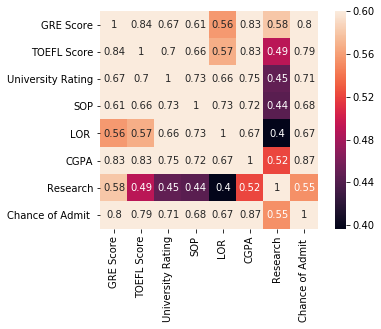

In [24]:
sns.heatmap(pd_data.drop(columns = ['Serial No.']).corr(), vmax=0.6, square=True, annot=True)

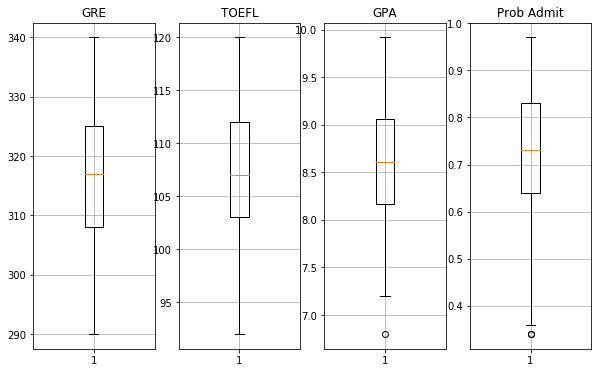

In [79]:
#Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
#       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
#      dtype='object')
plt.figure(1, figsize=(10,6))
plt.subplot(1,4, 1)
plt.grid()
plt.boxplot(pd_data['GRE Score'])
plt.title('GRE')
plt.subplot(1,4, 2)
plt.grid()
plt.boxplot(pd_data['TOEFL Score'])
plt.title('TOEFL')
plt.subplot(1,4, 3)
plt.grid()
plt.boxplot(pd_data['CGPA'])
plt.title('GPA')
plt.subplot(1,4, 4)
plt.grid()
plt.boxplot(pd_data['Chance of Admit '])
plt.title('Prob Admit')
plt.show()